In [59]:
from wiki_dump_reader import Cleaner, iterate

#https://github.com/CyberZHG/wiki-dump-reader
#pip install wiki-dump-reader
#Code adapted from https://github.com/CyberZHG/wiki-dump-reader
def write_corpus():
    corpus_file = 'D:/Text Analytics/MRcorpus.txt'
    page_count = 0
    cleaner = Cleaner()
    with open(corpus_file, 'w', encoding='utf-8') as output:
        for title, text in iterate('D:/Text Analytics/mrwiki-latest-pages-articles.xml'):
            text = cleaner.clean_text(text)
            cleaned_text, links = cleaner.build_links(text)
            output.write(title + '\n' + cleaned_text + '\n')
            page_count += 1
#            if page_count % 100 == 0:
#                print('Pages dumped = ', page_count)

    output.close()
write_corpus()

In [60]:
 f = open('D:/Text Analytics/MRcorpus.txt',encoding = "utf8")

In [61]:
txt_dt = f.read()

In [62]:
txt_dt[0:500]

'औदुंबर (कविता)\n॥ औदुंबर रसग्रहण ॥\nएखाद्या कुशल चित्रकाराने कुंचल्याच्या अवघ्या चार-सहा फटकाऱ्यांसरशी एखादे सुरेख चित्र निर्माण करावे तद्वत अवघ्या आठ ओळीत बालकवींनी एक सुंदर निसर्गचित्र शब्दांच्या कुंचल्याने या कवितेत रेखाटलेले आहे.  हे चित्र रंगविताना कवीने विविध रंग वापरलेले आढळतील. निळासावळा झरा, शेतमळ्यांची हिरवी गरदी, पांढरी पायवाट व काळा डोह-मोजक्या रंगांनी शब्दांच्या चौकटीत बसविलेले हे एक साधे व जिवंत चित्र आहे.  बालकवींची रंगदृष्टी येथे आपल्या प्रत्ययास येते.\nपहिल्या चार ओळींत टेकड्या, गा'

In [63]:
import re
import copy

In [64]:
copy_txt = copy.deepcopy(txt_dt)

In [65]:
only_mr_pun = re.sub(r"[^\u0900-\u097F, \u0021, \u0022, \u0027, \u002C, \u002E, \u003A, \u003B, \u003F]+", " ", txt_dt)

In [66]:
only_mr_pun[0:500]

'औदुंबर  कविता ॥ औदुंबर रसग्रहण ॥ एखाद्या कुशल चित्रकाराने कुंचल्याच्या अवघ्या चार सहा फटकाऱ्यांसरशी एखादे सुरेख चित्र निर्माण करावे तद्वत अवघ्या आठ ओळीत बालकवींनी एक सुंदर निसर्गचित्र शब्दांच्या कुंचल्याने या कवितेत रेखाटलेले आहे.  हे चित्र रंगविताना कवीने विविध रंग वापरलेले आढळतील. निळासावळा झरा, शेतमळ्यांची हिरवी गरदी, पांढरी पायवाट व काळा डोह मोजक्या रंगांनी शब्दांच्या चौकटीत बसविलेले हे एक साधे व जिवंत चित्र आहे.  बालकवींची रंगदृष्टी येथे आपल्या प्रत्ययास येते. पहिल्या चार ओळींत टेकड्या, गाव'

In [67]:
only_mr = re.sub(r"[^\u0900-\u097F]+", " ", txt_dt)

In [68]:
only_mr[0:500]

'औदुंबर कविता ॥ औदुंबर रसग्रहण ॥ एखाद्या कुशल चित्रकाराने कुंचल्याच्या अवघ्या चार सहा फटकाऱ्यांसरशी एखादे सुरेख चित्र निर्माण करावे तद्वत अवघ्या आठ ओळीत बालकवींनी एक सुंदर निसर्गचित्र शब्दांच्या कुंचल्याने या कवितेत रेखाटलेले आहे हे चित्र रंगविताना कवीने विविध रंग वापरलेले आढळतील निळासावळा झरा शेतमळ्यांची हिरवी गरदी पांढरी पायवाट व काळा डोह मोजक्या रंगांनी शब्दांच्या चौकटीत बसविलेले हे एक साधे व जिवंत चित्र आहे बालकवींची रंगदृष्टी येथे आपल्या प्रत्ययास येते पहिल्या चार ओळींत टेकड्या गाव शेतमळे व '

In [69]:
len(only_mr)

56225453

In [70]:
words = only_mr.split()

In [71]:
words[0:5]

['औदुंबर', 'कविता', '॥', 'औदुंबर', 'रसग्रहण']

In [72]:
frequency = {}

In [73]:
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

In [74]:
frequency['चित्र']

2458

In [75]:
uni_words = set(words)

In [76]:
#counts = [(w,words.count(w)) for w in uni_words]
#counts[0:10]

In [77]:
len(words)

8483808

In [78]:
import numpy as np

In [79]:
freq_desc = sorted(frequency.items(), key = lambda kv:(kv[1], kv[0]), reverse = True) 

In [80]:
dict(freq_desc[0:100])

{'अंतरावर': 8744,
 'अनेक': 12535,
 'असते': 9500,
 'असून': 10749,
 'असे': 18433,
 'आणि': 89856,
 'आले': 10310,
 'आहे': 127801,
 'आहेत': 35065,
 'इ': 58189,
 'इतर': 7657,
 'उपलब्ध': 9345,
 'एक': 42084,
 'एका': 8497,
 'करण्यात': 7629,
 'करून': 11146,
 'काम': 8349,
 'काही': 12872,
 'किंवा': 12048,
 'केला': 11979,
 'केली': 18219,
 'केले': 29212,
 'क्रिकेट': 12844,
 'खेळाडू': 10158,
 'गावात': 10526,
 'चरित्रलेख': 7760,
 'चित्रपट': 12150,
 'च्या': 17491,
 'जन्म': 16146,
 'जाते': 13532,
 'जास्त': 7729,
 'जिल्हा': 8584,
 'जी': 9157,
 'झाला': 13600,
 'झाली': 11463,
 'झाले': 14793,
 'डॉ': 8514,
 'तर': 13533,
 'तसेच': 11318,
 'ते': 32051,
 'तो': 8742,
 'त्या': 13152,
 'त्यांच्या': 10794,
 'त्यांना': 7790,
 'त्यांनी': 17547,
 'दुवे': 11866,
 'दोन': 9800,
 'नाव': 11185,
 'नाही': 20650,
 'पण': 8009,
 'पहा': 7853,
 'पुणे': 7585,
 'पुनर्निर्देशन': 41169,
 'पुरस्कार': 13634,
 'पुरुष': 8637,
 'बाह्य': 11384,
 'भारतीय': 23660,
 'भोपाळ': 22820,
 'मतदारसंघ': 8342,
 'मधील': 17677,
 'मध्ये': 26785,
 'मराठी': 

In [81]:
s = dict(freq_desc).values()
s = np.array(s)

In [82]:
import pandas as pd

In [83]:
all_freqs_wrds = pd.DataFrame.from_dict(frequency, orient='index').reset_index()

In [84]:
all_freqs_wrds.head()

,index,0
0,तर्हांचे,2
1,पोटनिवडणुकांमध्ये,1
2,अष्टांग,39
3,अर्पानेट,4
4,यावेळेसपासुन,1


In [85]:
all_freqs_wrds = all_freqs_wrds.rename(columns={'index':'terms', 0:'count'})

In [86]:
all_freqs_wrds.sort_values(by = 'count', ascending = False, inplace = True)

In [87]:
all_freqs_wrds = all_freqs_wrds.reset_index(drop=True)

In [88]:
all_freqs_wrds.head(10)

,terms,count
0,आहे,127801
1,आणि,89856
2,या,85627
3,व,74015
4,हे,63720
5,स,59744
6,इ,58189
7,हा,43898
8,एक,42084
9,पुनर्निर्देशन,41169


In [89]:
all_freqs_wrds['rank'] = all_freqs_wrds.index + 1
all_freqs_wrds.head()

,terms,count,rank
0,आहे,127801,1
1,आणि,89856,2
2,या,85627,3
3,व,74015,4
4,हे,63720,5


In [90]:
all_freqs_wrds['zipf'] = 127801 / all_freqs_wrds['count']
all_freqs_wrds.head()

,terms,count,rank,zipf
0,आहे,127801,1,1.000000
1,आणि,89856,2,1.422287
2,या,85627,3,1.492532
3,व,74015,4,1.726691
4,हे,63720,5,2.005665


In [91]:
all_freqs_wrds['check'] = np.log(all_freqs_wrds['rank'])/np.log(all_freqs_wrds['zipf'])

In [92]:
all_freqs_wrds.head(20)

,terms,count,rank,zipf,check
0,आहे,127801,1,1.000000,NaN
1,आणि,89856,2,1.422287,1.967681
2,या,85627,3,1.492532,2.743282
3,व,74015,4,1.726691,2.538040
4,हे,63720,5,2.005665,2.312491
5,स,59744,6,2.139144,2.356321
6,इ,58189,7,2.196309,2.473264
7,हा,43898,8,2.911317,1.945939
8,एक,42084,9,3.036807,1.978044
9,पुनर्निर्देशन,41169,10,3.104302,2.032669


In [93]:
[np.nanmin(all_freqs_wrds['check']), np.mean(all_freqs_wrds['check']), np.nanmax(all_freqs_wrds['check'])]

[1.0433867108789419, 1.1051305649221752, 2.74328190321641]

In [94]:
all_freqs_wrds['check2'] = all_freqs_wrds['zipf']**(1/1.0569009843256845)
all_freqs_wrds['check3'] = np.ceil(all_freqs_wrds['check2'])
all_freqs_wrds.head(10)

,terms,count,rank,zipf,check,check2,check3
0,आहे,127801,1,1.000000,NaN,1.000000,1.0
1,आणि,89856,2,1.422287,1.967681,1.395567,2.0
2,या,85627,3,1.492532,2.743282,1.460696,2.0
3,व,74015,4,1.726691,2.538040,1.676654,2.0
4,हे,63720,5,2.005665,2.312491,1.931904,2.0
5,स,59744,6,2.139144,2.356321,2.053339,3.0
6,इ,58189,7,2.196309,2.473264,2.105220,3.0
7,हा,43898,8,2.911317,1.945939,2.748553,3.0
8,एक,42084,9,3.036807,1.978044,2.860521,3.0
9,पुनर्निर्देशन,41169,10,3.104302,2.032669,2.920638,3.0


In [95]:
all_freqs_wrds.tail(10)

,terms,count,rank,zipf,check,check2,check3
494580,क्रिकेटसारख्या,1,494581,127801.0,1.115088,67859.528756,67860.0
494581,लंडसेटने,1,494582,127801.0,1.115089,67859.528756,67860.0
494582,प्रवासवर्णनाला,1,494583,127801.0,1.115089,67859.528756,67860.0
494583,सूचनेकडे,1,494584,127801.0,1.115089,67859.528756,67860.0
494584,कोंकणातील,1,494585,127801.0,1.115089,67859.528756,67860.0
494585,वैद्यकशास्त्राचे,1,494586,127801.0,1.115089,67859.528756,67860.0
494586,जनगणनेसारखे,1,494587,127801.0,1.115089,67859.528756,67860.0
494587,शिवबाच्या,1,494588,127801.0,1.115090,67859.528756,67860.0
494588,सैगल४९,1,494589,127801.0,1.115090,67859.528756,67860.0
494589,गमावशील,1,494590,127801.0,1.115090,67859.528756,67860.0


In [96]:
tokens = len(words)
print(tokens)

8483808


In [97]:
type = len(uni_words)
print(type)

494590


In [98]:
import matplotlib.pyplot as plt

y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [all_freqs_wrds.sort_values(by='count', ascending=False)['count'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, all_freqs_wrds.sort_values(by='count', ascending=False)['count'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens')

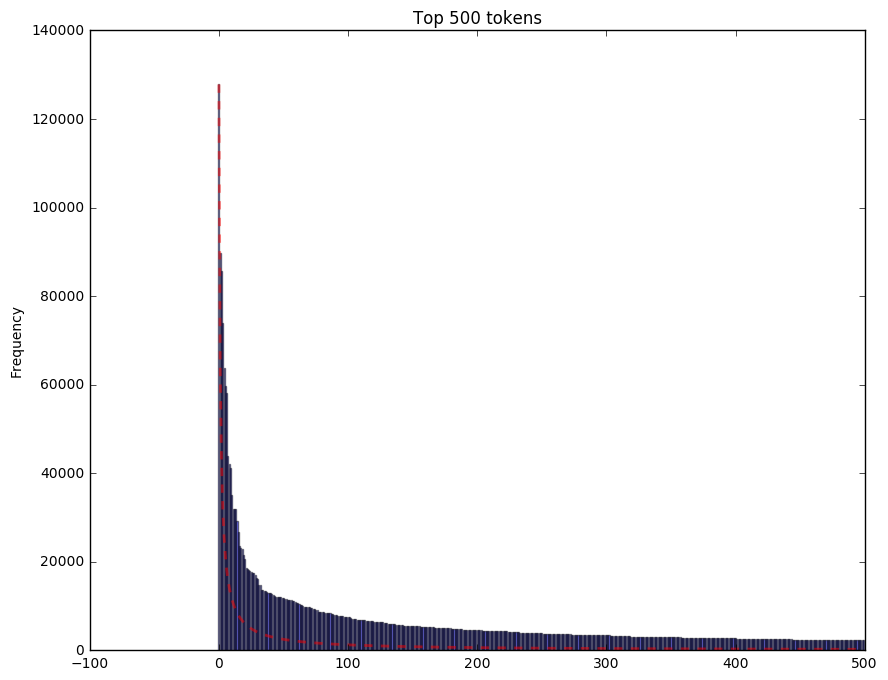

In [99]:
plt.show()

In [100]:
from pylab import *
counts = all_freqs_wrds['count']
tokens = all_freqs_wrds.index
ranks = all_freqs_wrds['rank']
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)

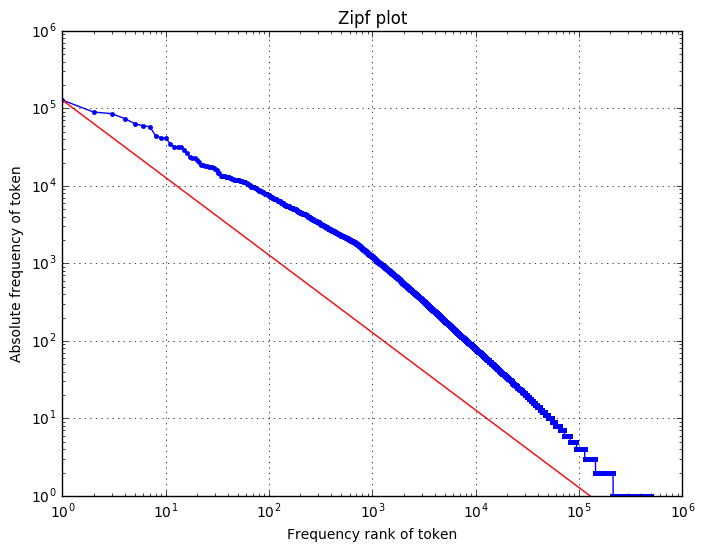

In [101]:
plt.show()

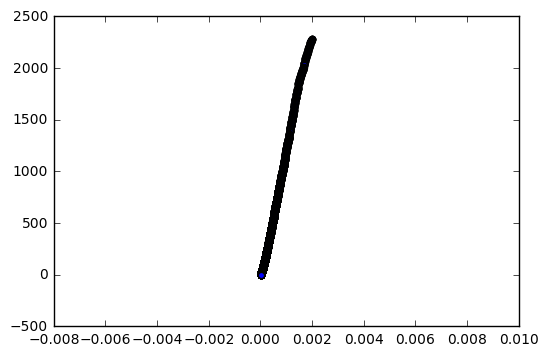

In [102]:
plt.scatter(x= 1/all_freqs_wrds['rank'][500:300000], y = all_freqs_wrds['count'][500:300000])
plt.show()